In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Patsy is a Python library that allows data transformation using arbitrary Python code.

# With Patsy, you could use human-readable syntax such as life_expectancy ~ income_group + year + region
#(life expectancy depends on income group, year, and region).

df = pd.read_excel("Life Expectancy at Birth.xlsx", engine="openpyxl")
# openpyxl is a Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files

df.dropna(inplace=True) # Drop null values

# Replace space with "_"
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" ")))
# Take a sample of the original data
sample = df.groupby("region").sample(n=20).sort_values(by="year")
sample

# OR simply
# df.head()


,country,country_code,region,income_group,year,life_expectancy
107,India,IND,South Asia,Lower middle income,1960,41.171951
157,Myanmar,MMR,East Asia & Pacific,Lower middle income,1960,42.736390
298,Switzerland,CHE,Europe & Central Asia,High income,1961,71.644878
503,Tunisia,TUN,Middle East & North Africa,Lower middle income,1961,42.645512
263,Aruba,ABW,Latin America & Caribbean,High income,1961,65.988024
...,...,...,...,...,...,...
14222,Bahrain,BHR,Middle East & North Africa,High income,2014,76.683268
14498,Canada,CAN,North America,High income,2015,82.137634
14471,United Arab Emirates,ARE,Middle East & North Africa,High income,2015,77.541244
14511,Costa Rica,CRI,Latin America & Caribbean,Upper middle income,2015,79.586463


In [10]:
from patsy import dmatrices

outcome, predictors = dmatrices(
    "life_expectancy ~ income_group + region + year", data=sample
)
outcome

DesignMatrix with shape (140, 1)
  life_expectancy
         41.17195
         42.73639
         71.64488
         42.64551
         65.98802
         45.50895
         41.79049
         61.89637
         70.11951
         64.46256
         44.15137
         73.44805
         50.38171
         33.45222
         50.14200
         71.77634
         41.89054
         71.22683
         36.59339
         31.54263
         45.69093
         40.68083
         71.53780
         51.56868
         73.66341
         70.29000
         73.34341
         53.35954
         55.80146
         58.90380
  [110 rows omitted]
  Terms:
    'life_expectancy' (column 0)
  (to view full data, use np.asarray(this_obj))

In [11]:
# outcome is a DesignMatrix object that represents life_expectancy , which is the variable we want to predict
# similarly predictors is a dmatrix object that repersents the combination of income_group , region , and year
predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'year']
  Terms:
    'Intercept' (column 0)
    'income_group' (columns 1:4)
    'region' (columns 4:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

In [12]:
# Cool! It seems like we got a feature matrix of shape (140, 11) . 140 indicates that there are 140 examples, and 11 indicates that there are 11 features.
# These 11 features are:

# Intercept (column 0) — an array of 1s
# income_group (column 1 to 4)
# region (column 4 to 10)
# year (column 10)

In [13]:
sample

,country,country_code,region,income_group,year,life_expectancy
107,India,IND,South Asia,Lower middle income,1960,41.171951
157,Myanmar,MMR,East Asia & Pacific,Lower middle income,1960,42.736390
298,Switzerland,CHE,Europe & Central Asia,High income,1961,71.644878
503,Tunisia,TUN,Middle East & North Africa,Lower middle income,1961,42.645512
263,Aruba,ABW,Latin America & Caribbean,High income,1961,65.988024
...,...,...,...,...,...,...
14222,Bahrain,BHR,Middle East & North Africa,High income,2014,76.683268
14498,Canada,CAN,North America,High income,2015,82.137634
14471,United Arab Emirates,ARE,Middle East & North Africa,High income,2015,77.541244
14511,Costa Rica,CRI,Latin America & Caribbean,Upper middle income,2015,79.586463


In [14]:
df['income_group'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [17]:
df1 = df.drop(['country','country_code'],axis = 1)
df1

,region,income_group,year,life_expectancy
0,Latin America & Caribbean,High income,1960,65.569366
1,South Asia,Low income,1960,32.328512
2,Sub-Saharan Africa,Lower middle income,1960,32.984829
3,Europe & Central Asia,Upper middle income,1960,62.254366
6,Middle East & North Africa,High income,1960,52.243220
...,...,...,...,...
14723,Europe & Central Asia,Lower middle income,2015,71.346341
14724,Middle East & North Africa,Lower middle income,2015,64.031390
14725,Sub-Saharan Africa,Upper middle income,2015,57.440902
14726,Sub-Saharan Africa,Lower middle income,2015,60.785683


In [23]:
#Data pre-processing, We have the work in isFraud and isFlaggedFraud which are already in 0 and 1 but we will encode other labels
#importing the label encoder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df1['income_group'] = encoder.fit_transform(df['income_group'])

In [24]:
df1

,region,income_group,year,life_expectancy
0,Latin America & Caribbean,0,1960,65.569366
1,South Asia,1,1960,32.328512
2,Sub-Saharan Africa,2,1960,32.984829
3,Europe & Central Asia,3,1960,62.254366
6,Middle East & North Africa,0,1960,52.243220
...,...,...,...,...
14723,Europe & Central Asia,2,2015,71.346341
14724,Middle East & North Africa,2,2015,64.031390
14725,Sub-Saharan Africa,3,2015,57.440902
14726,Sub-Saharan Africa,2,2015,60.785683


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    predictors, outcome, test_size=0.25, random_state=42
)
y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [20]:
df.corr()

,year,life_expectancy
year,1.000000,0.434466
life_expectancy,0.434466,1.000000


In [21]:
df1.corr()

,year,life_expectancy
year,1.000000,0.434466
life_expectancy,0.434466,1.000000


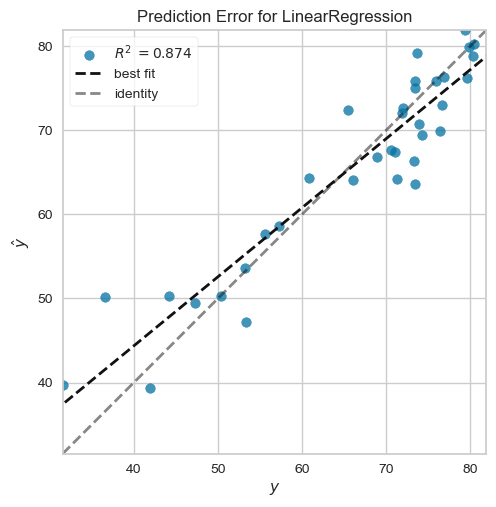

In [26]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

model = LinearRegression()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [27]:
def split_data_into_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()
    return X_train, X_test, y_train, y_test


def plot_equation(data: pd.DataFrame, equation: str):

    # Create X and y
    outcome, predictors = dmatrices(equation, data=data)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data_into_train_test(predictors, outcome)

    # Instantiate a model
    model = LinearRegression()

    # Visualize model
    visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

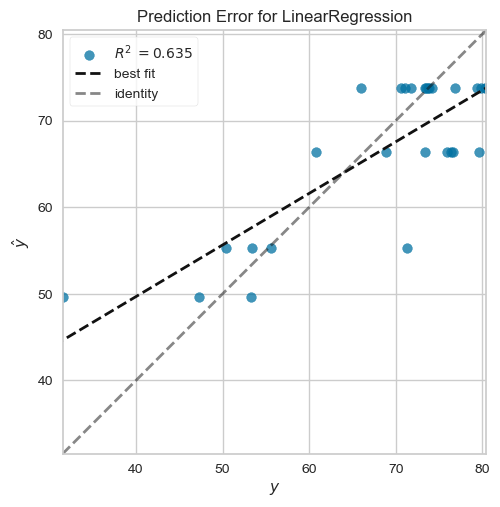

In [28]:
plot_equation(sample, "life_expectancy ~ income_group")

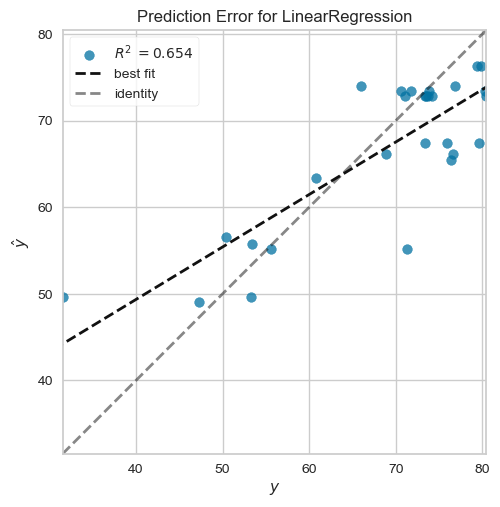

In [29]:
plot_equation(sample, "life_expectancy ~ income_group + region")


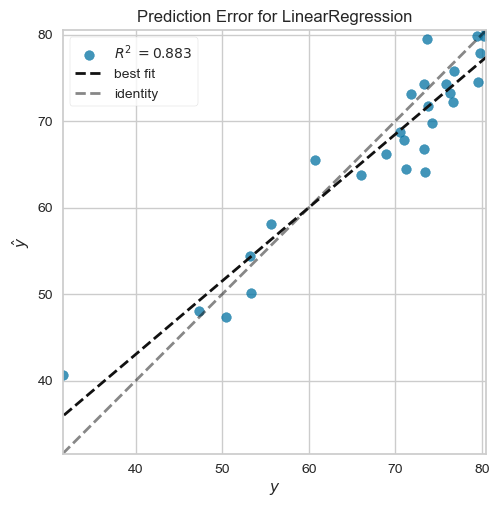

In [30]:
plot_equation(sample, "life_expectancy ~ income_group + year")